In [11]:
# !pip install nuscenes-devkit==1.1.9 &> /dev/null  # Install nuScenes.

In [119]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes

nusc = NuScenes(version="v1.0-eval", dataroot="./data/nuscenes_eval" , verbose=True)

Loading NuScenes tables for version v1.0-eval...
0 category,
0 attribute,
0 visibility,
0 instance,
12 sensor,
12 calibrated_sensor,
1 ego_pose,
1 log,
1 scene,
61 sample,
19155 sample_data,
0 sample_annotation,
1 map,
Done loading in 0.061 seconds.
Reverse indexing ...
Done reverse indexing in 0.0 seconds.


In [120]:
#データセット内に含まれる全シーンの一覧を取得する
nusc.list_scenes()

scene_1, Evaluation scene [70-01-01 00:00:02]   30s, eval, #anns:0


{'token': '46e855ec-d175-4578-a2a4-25efdcaa1c3a', 'name': 'scene_1', 'description': 'Evaluation scene', 'log_token': '7211a525-ebbb-47f1-9f57-53539b6dbc0c', 'nbr_samples': 61, 'first_sample_token': '688925d9-72c7-4702-bcaa-1e5aae78e083', 'last_sample_token': '328f09aa-7efc-44bf-af82-dd23ab21154a'}
688925d9-72c7-4702-bcaa-1e5aae78e083


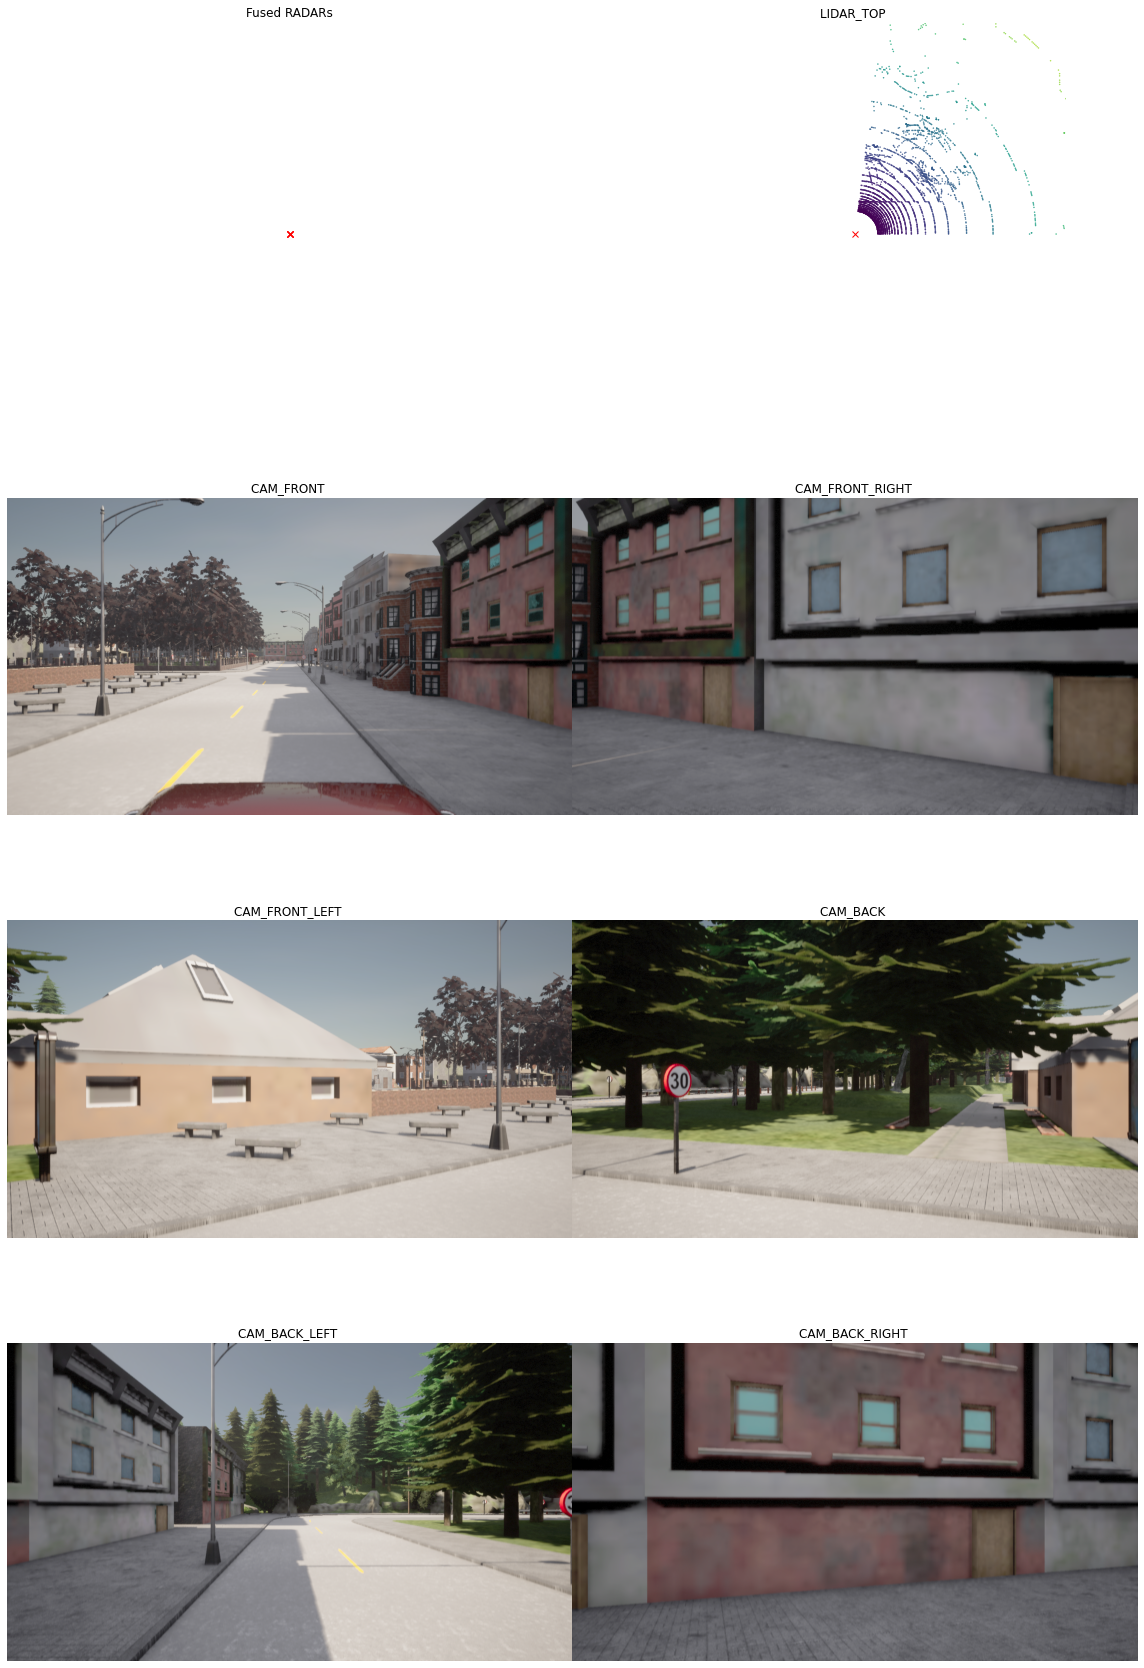

In [121]:
# 最初のシーンを取得
scene = nusc.scene[0]
print(scene)

# 最初の sample_token を取得
first_sample_token = scene['first_sample_token']
print(first_sample_token)

# sample を可視化（画像 or LiDAR にバウンディングボックス付き）
nusc.render_sample(first_sample_token)


In [122]:
my_sample = nusc.get('sample', first_sample_token)
print(my_sample)

{'token': '688925d9-72c7-4702-bcaa-1e5aae78e083', 'scene_token': '46e855ec-d175-4578-a2a4-25efdcaa1c3a', 'prev': '', 'next': '269a4153-b7c0-4cd0-a1a3-312bacb18abf', 'timestamp': 2965348, 'data': {'CAM_FRONT': '97867547-1e6d-4372-81ae-af9a192c6743', 'CAM_FRONT_RIGHT': '5ea5b8cb-9bcc-405f-8309-3042a67f0045', 'CAM_FRONT_LEFT': '16e2e3f3-a19b-423f-a096-bbf35faf0ad9', 'CAM_BACK': '6b2ca3ce-c62f-432e-ac41-97c90880a315', 'CAM_BACK_LEFT': 'e9a14f8c-70d9-4e78-81b7-fb268c88ec1a', 'CAM_BACK_RIGHT': '1ebba5f1-3b6f-4bdd-91ca-ae3805231940', 'RADAR_FRONT': '3eba743d-5746-4ea6-8181-cad5500c7dc0', 'RADAR_FRONT_LEFT': 'df0b95cd-1d9f-4176-8b27-51d2234f9355', 'RADAR_FRONT_RIGHT': 'af8028e5-0abe-4102-b523-1a280cccacc4', 'RADAR_BACK_LEFT': 'e64fe9e3-87ba-4634-b970-b04ba3db978e', 'RADAR_BACK_RIGHT': 'b06c225b-1639-414f-b040-12c60943634b', 'LIDAR_TOP': '07797bf8-b21f-48be-9a09-7e017f295bed'}, 'anns': []}


In [123]:
# 指定した サンプル（1フレーム） に含まれる 全てのセンサーデータ（sample_data） を一覧表示する
# どのセンサで撮像されたものか、どういったアノテーション情報が含まれているか
nusc.list_sample(my_sample['token'])

Sample: 688925d9-72c7-4702-bcaa-1e5aae78e083

sample_data_token: 97867547-1e6d-4372-81ae-af9a192c6743, mod: camera, channel: CAM_FRONT
sample_data_token: 5ea5b8cb-9bcc-405f-8309-3042a67f0045, mod: camera, channel: CAM_FRONT_RIGHT
sample_data_token: 16e2e3f3-a19b-423f-a096-bbf35faf0ad9, mod: camera, channel: CAM_FRONT_LEFT
sample_data_token: 6b2ca3ce-c62f-432e-ac41-97c90880a315, mod: camera, channel: CAM_BACK
sample_data_token: e9a14f8c-70d9-4e78-81b7-fb268c88ec1a, mod: camera, channel: CAM_BACK_LEFT
sample_data_token: 1ebba5f1-3b6f-4bdd-91ca-ae3805231940, mod: camera, channel: CAM_BACK_RIGHT
sample_data_token: 3eba743d-5746-4ea6-8181-cad5500c7dc0, mod: radar, channel: RADAR_FRONT
sample_data_token: df0b95cd-1d9f-4176-8b27-51d2234f9355, mod: radar, channel: RADAR_FRONT_LEFT
sample_data_token: af8028e5-0abe-4102-b523-1a280cccacc4, mod: radar, channel: RADAR_FRONT_RIGHT
sample_data_token: e64fe9e3-87ba-4634-b970-b04ba3db978e, mod: radar, channel: RADAR_BACK_LEFT
sample_data_token: b06c225

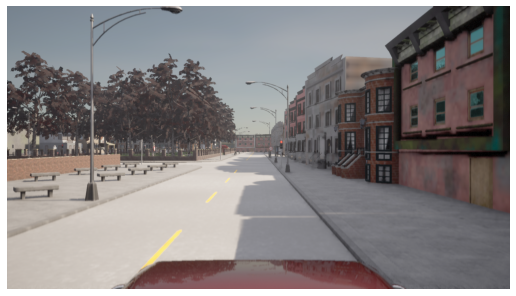

In [125]:
nusc.render_pointcloud_in_image(my_sample['token'], pointsensor_channel='LIDAR_TOP', render_intensity=True)

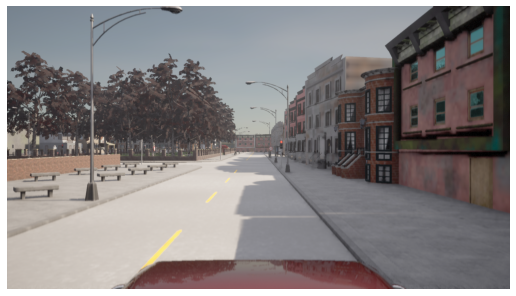

In [124]:
nusc.render_pointcloud_in_image(my_sample['token'], pointsensor_channel='RADAR_FRONT')